In [1]:
# librarys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Excel file
df = pd.read_excel('D:\copper\Copper_Set.xlsx')
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [4]:
print(len(df['item_date'].unique()))
print(len(df['quantity tons'].unique()))
print(len(df['customer'].unique()))
print(len(df['country'].unique()))
print(len(df['status'].unique()))
print(len(df['item type'].unique()))
print(len(df['application'].unique()))
print(len(df['thickness'].unique()))
print(len(df['width'].unique()))
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique()))
print(len(df['delivery date'].unique()))
print(len(df['selling_price'].unique()))

253
181673
1170
18
10
7
31
595
1386
16564
33
29
9796


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


Dealing with data in wrong format

In [8]:
# Convert 'item_date' to datetime and then to date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [9]:
# Convert 'item_date' to datetime and then to date
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [10]:
# Remove leading zeros from material_ref
df['material_ref'] = df['material_ref'].str.lstrip('0')

In [11]:
df.isna().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [12]:
# List of columns for which missing values will be replaced with the mean
columns_mean = ["quantity tons" , "thickness", "width", "selling_price"]
means = df[columns_mean].mean()
df[columns_mean] = df[columns_mean].fillna(means)

In [13]:
# List of columns for which missing values will be replaced with the mode
columns_mode = ['item_date', 'status', 'delivery date', 'customer', 'country', 'item type', 'application', 'material_ref', 'product_ref']
modes = df[columns_mode].mode().iloc[0]                                  
df[columns_mode] = df[columns_mode].fillna(modes)

In [14]:
df.isna().sum()

id               2
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [15]:
df = df.dropna(subset=['id'])

In [16]:
df['country'].isna().sum()

np.int64(0)

In [17]:
# df.dropna(inplace=True)
len(df)

181671

In [18]:
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181671 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181671 non-null  object 
 2   quantity tons  181671 non-null  float64
 3   customer       181671 non-null  float64
 4   country        181671 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181671 non-null  object 
 7   application    181671 non-null  float64
 8   thickness      181671 non-null  float64
 9   width          181671 non-null  float64
 10  material_ref   181671 non-null  object 
 11  product_ref    181671 non-null  int64  
 12  delivery date  181671 non-null  object 
 13  selling_price  181671 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [20]:
# df['country'] = df['country'].astype(np.int64)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181671 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181671 non-null  object 
 2   quantity tons  181671 non-null  float64
 3   customer       181671 non-null  float64
 4   country        181671 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181671 non-null  object 
 7   application    181671 non-null  float64
 8   thickness      181671 non-null  float64
 9   width          181671 non-null  float64
 10  material_ref   181671 non-null  object 
 11  product_ref    181671 non-null  int64  
 12  delivery date  181671 non-null  object 
 13  selling_price  181671 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [22]:
#Treating outliers and skewness
data_eda=df.copy(True)

EXPLORATORY DATA ANALYSIS

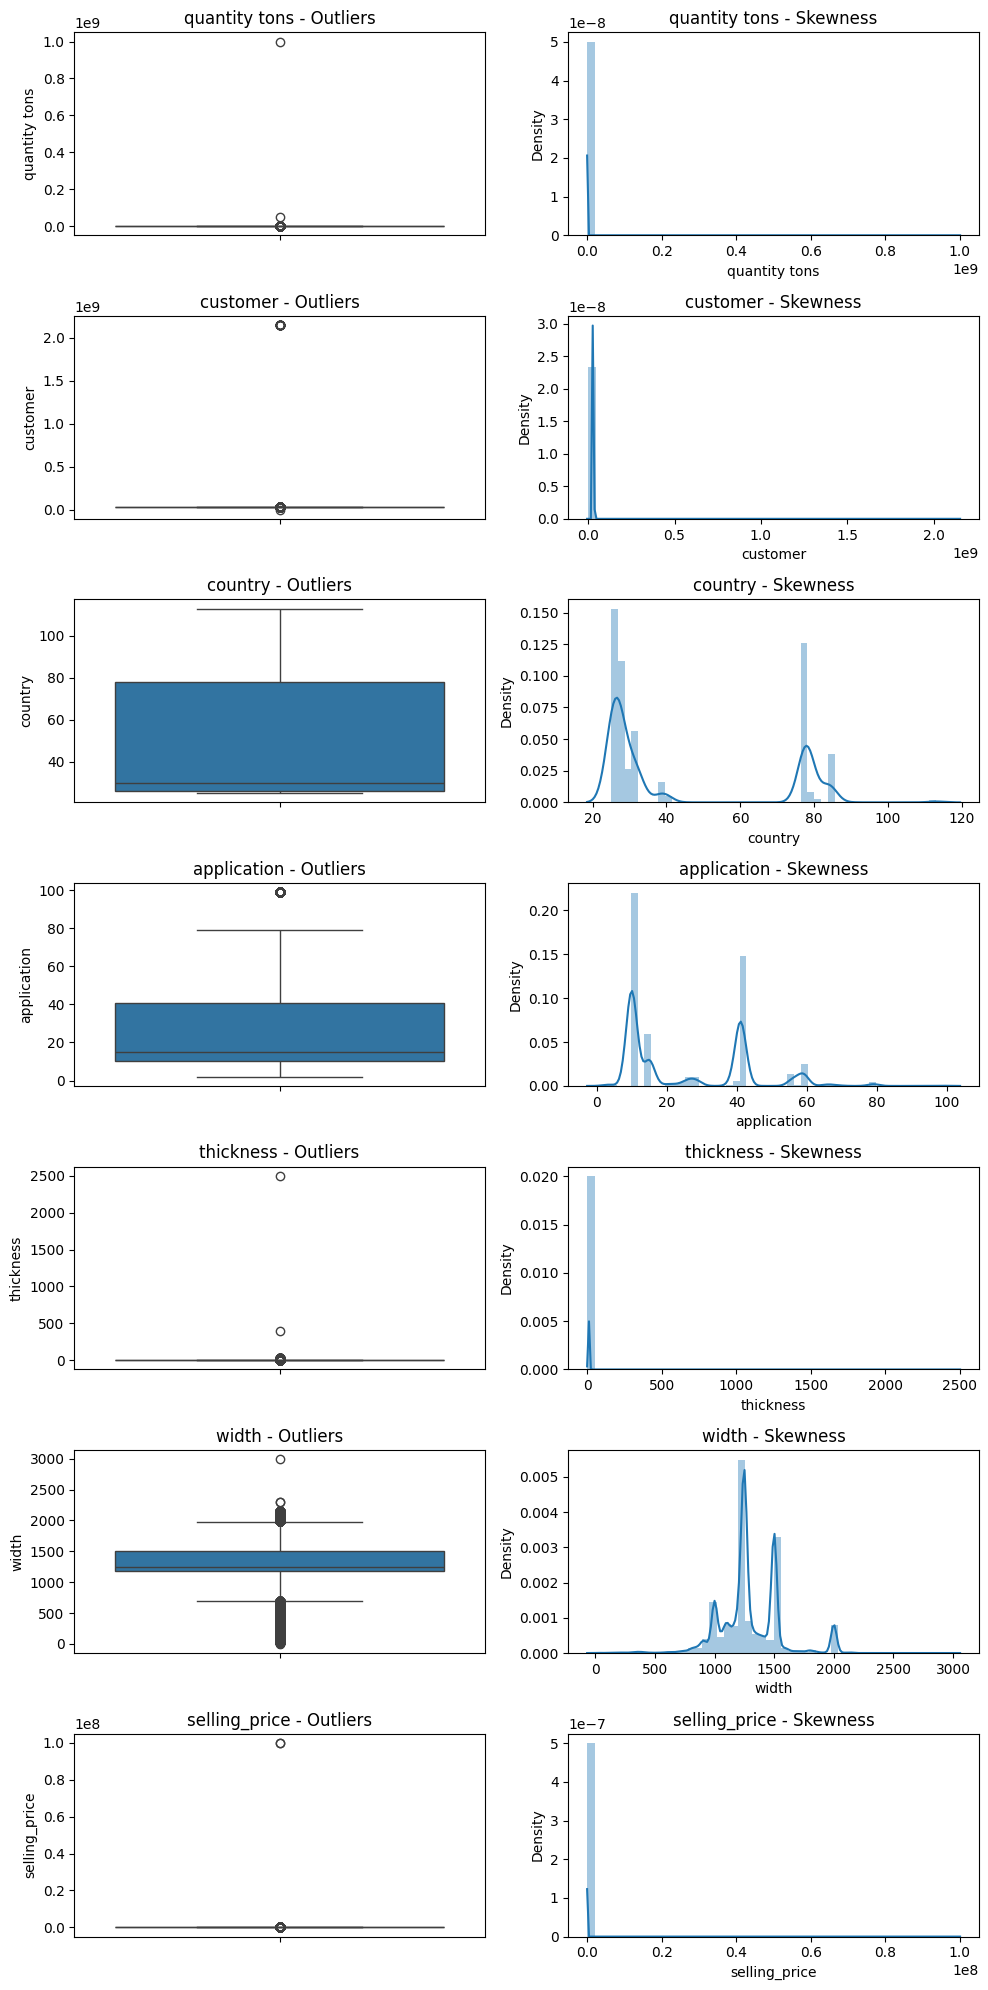

In [23]:
# Create a figure with 6 subplots
fig, axes = plt.subplots(7, 2, figsize=(10,20))
 
sns.boxplot(ax=axes[0, 0], data=data_eda['quantity tons'])      
axes[0, 0].set_title('quantity tons - Outliers')
sns.distplot(ax=axes[0, 1], a=data_eda['quantity tons'])
axes[0, 1].set_title('quantity tons - Skewness')
 
sns.boxplot(ax=axes[1, 0], data=data_eda['customer'])          
axes[1, 0].set_title('customer - Outliers')
sns.distplot(ax=axes[1, 1], a=data_eda['customer'])
axes[1, 1].set_title('customer - Skewness')

sns.boxplot(ax=axes[2, 0], data=data_eda['country'])          
axes[2, 0].set_title('country - Outliers')
sns.distplot(ax=axes[2, 1], a=data_eda['country'])
axes[2, 1].set_title('country - Skewness')

sns.boxplot(ax=axes[3, 0], data=data_eda['application'])       
axes[3, 0].set_title('application - Outliers')
sns.distplot(ax=axes[3, 1], a=data_eda['application'])
axes[3, 1].set_title('application - Skewness')

sns.boxplot(ax=axes[4, 0], data=data_eda['thickness'])        
axes[4, 0].set_title('thickness - Outliers')
sns.distplot(ax=axes[4, 1], a=data_eda['thickness'])
axes[4, 1].set_title('thickness - Skewness')

sns.boxplot(ax=axes[5, 0], data=data_eda['width'])            
axes[5, 0].set_title('width - Outliers')
sns.distplot(ax=axes[5, 1], a=data_eda['width'])
axes[5, 1].set_title('width - Skewness')

sns.boxplot(ax=axes[6, 0], data=data_eda['selling_price'])   
axes[6, 0].set_title('selling_price - Outliers')
sns.distplot(ax=axes[6, 1], a=data_eda['selling_price'])
axes[6, 1].set_title('selling_price - Skewness')

plt.tight_layout()
plt.show()

violinplot

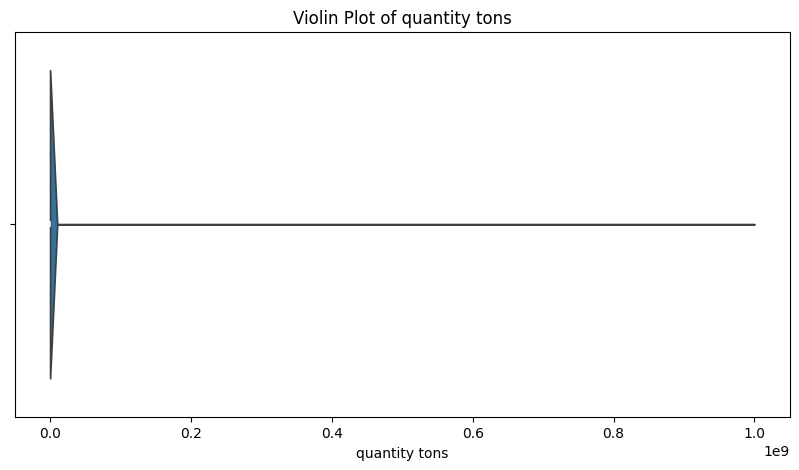

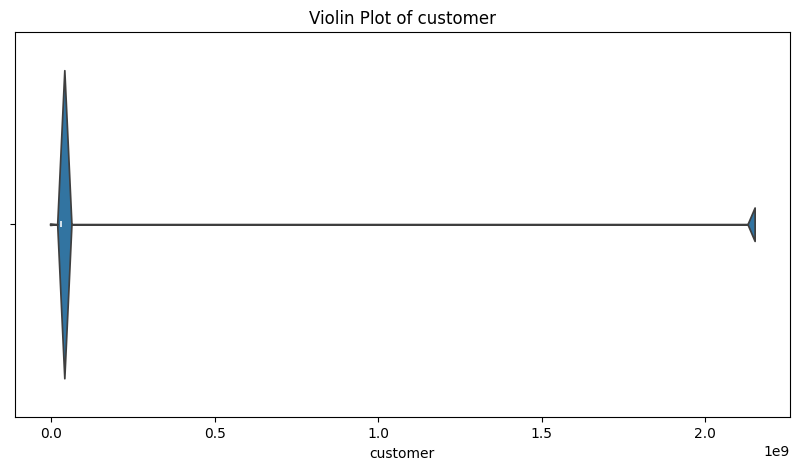

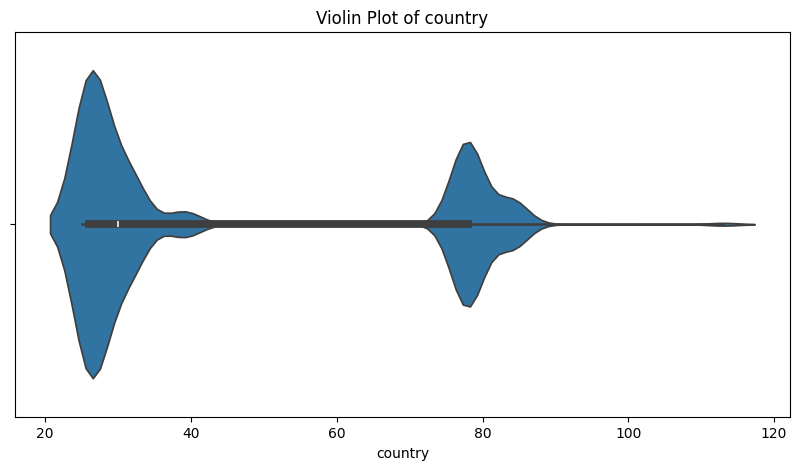

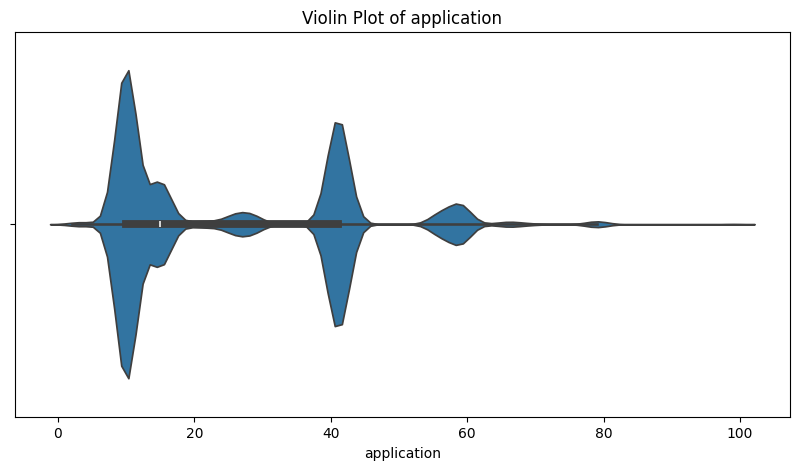

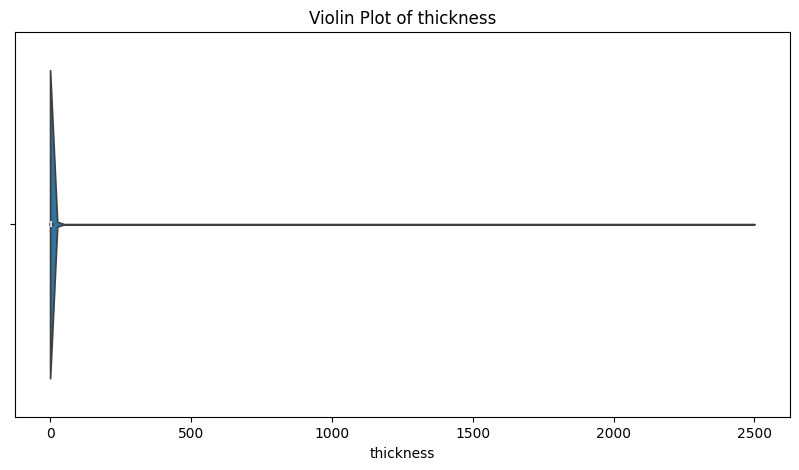

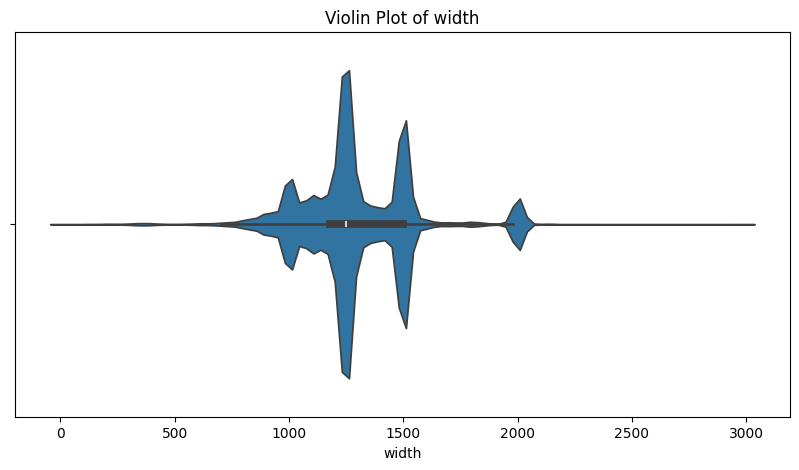

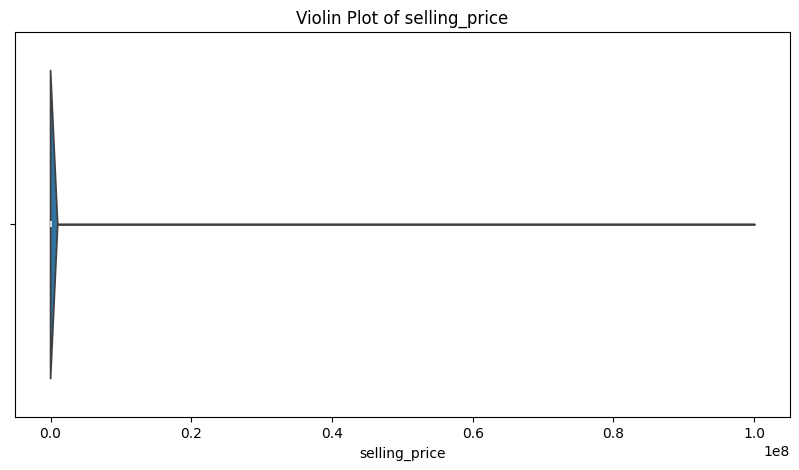

In [24]:
# Specify the columns you want to plot
columns = ['quantity tons', 'customer', 'country', 'application', 
           'thickness', 'width', 'selling_price']

# Create a filtered DataFrame
df_filtered = data_eda[columns]

# Plotting violin plots for each column in df_filtered
for col in columns:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=df_filtered[col])
    plt.title(f'Violin Plot of {col}')
    plt.show()

In [25]:
# Handling invalid data in the DataFrame

mask1 = data_eda['selling_price'] <= 0
print(mask1.sum())
data_eda.loc[mask1, 'selling_price'] = np.nan

mask2 = data_eda['quantity tons'] <= 0
print(mask2.sum())
data_eda.loc[mask2, 'quantity tons'] = np.nan

mask3 = data_eda['thickness'] <= 0
print(mask3.sum())

7
4
0


In [26]:
data_eda.dropna(inplace=True)

IQR PROCESS

In [27]:
import pandas as pd

# Assuming 'out_skew_data' is your DataFrame containing the data
# outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price','customer','application']

# Calculate summary statistics before removing outliers
before_stats = data_eda[outlier_columns].describe()

# Iterate over outlier columns and remove outliers
for column in outlier_columns:
    Q1 = data_eda[column].quantile(0.25)
    Q3 = data_eda[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_eda[column] = data_eda[column].clip(lower_bound, upper_bound)

# Calculate summary statistics after removing outliers
after_stats = data_eda[outlier_columns].describe()

# Compare the statistics before and after outlier removal
print("Summary statistics before removing outliers:")
print(before_stats)
print("\nSummary statistics after removing outliers:")
print(after_stats)

Summary statistics before removing outliers:
       quantity tons      thickness          width  selling_price  \
count   1.816600e+05  181660.000000  181660.000000   1.816600e+05   
mean    5.875355e+03       2.551142    1295.292519   1.918167e+03   
std     2.349159e+06       2.977130     261.637880   3.318066e+05   
min     1.000000e-05       0.180000       1.000000   1.000000e-01   
25%     1.097070e+01       0.700000    1180.000000   6.690000e+02   
50%     3.036519e+01       1.500000    1250.000000   8.120000e+02   
75%     6.716166e+01       3.000000    1500.000000   9.530000e+02   
max     1.000000e+09     400.000000    2990.000000   1.000010e+08   

           customer    application  
count  1.816600e+05  181660.000000  
mean   3.051223e+07      25.613245  
std    2.433462e+07      17.753830  
min    1.245800e+04       2.000000  
25%    3.019688e+07      10.000000  
50%    3.020524e+07      15.000000  
75%    3.028042e+07      41.000000  
max    2.147484e+09      99.000000  


<function matplotlib.pyplot.show(close=None, block=None)>

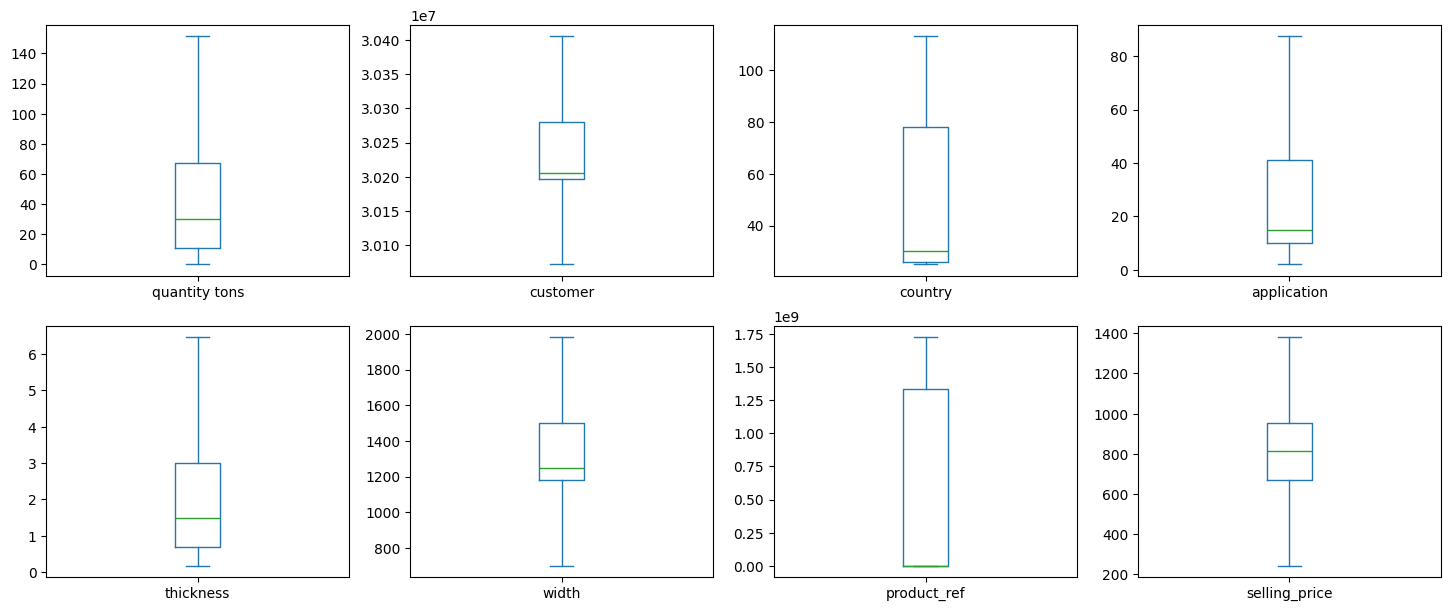

In [28]:
#After treating outliers and skewness
data_eda.plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

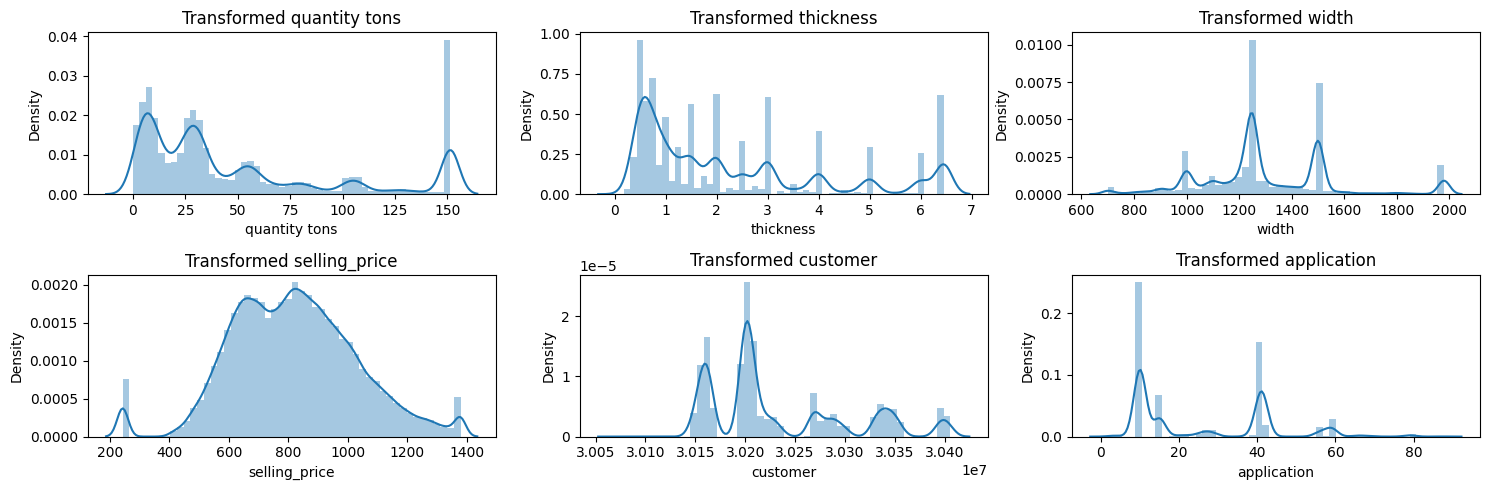

In [29]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price','customer','application']

# Plot the histograms of the transformed data
fig, axes = plt.subplots(2, 3,figsize=(15, 5))
axes = axes.flatten()
for i, column in enumerate(outlier_columns):
    sns.distplot(data_eda[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Transformed {column}")

plt.tight_layout()
plt.show()

FEATURE ENGINEERING

In [30]:
skewed_data=data_eda.copy(True)
skewed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181660 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181660 non-null  object 
 1   item_date      181660 non-null  object 
 2   quantity tons  181660 non-null  float64
 3   customer       181660 non-null  float64
 4   country        181660 non-null  float64
 5   status         181660 non-null  object 
 6   item type      181660 non-null  object 
 7   application    181660 non-null  float64
 8   thickness      181660 non-null  float64
 9   width          181660 non-null  float64
 10  material_ref   181660 non-null  object 
 11  product_ref    181660 non-null  int64  
 12  delivery date  181660 non-null  object 
 13  selling_price  181660 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [31]:
# Convert 'delivery date' to datetime
skewed_data['delivery date'] = pd.to_datetime(skewed_data['delivery date'])
skewed_data['item_date'] = pd.to_datetime(skewed_data['item_date'])
skewed_data['delivery_time_taken'] = (skewed_data['delivery date'] - skewed_data['item_date']).abs().dt.days
skewed_data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,151.448104,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,151.448104,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,151.448104,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,151.448104,30211560.0,28.0,Won,W,10.0,4.00,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31


Heat Map

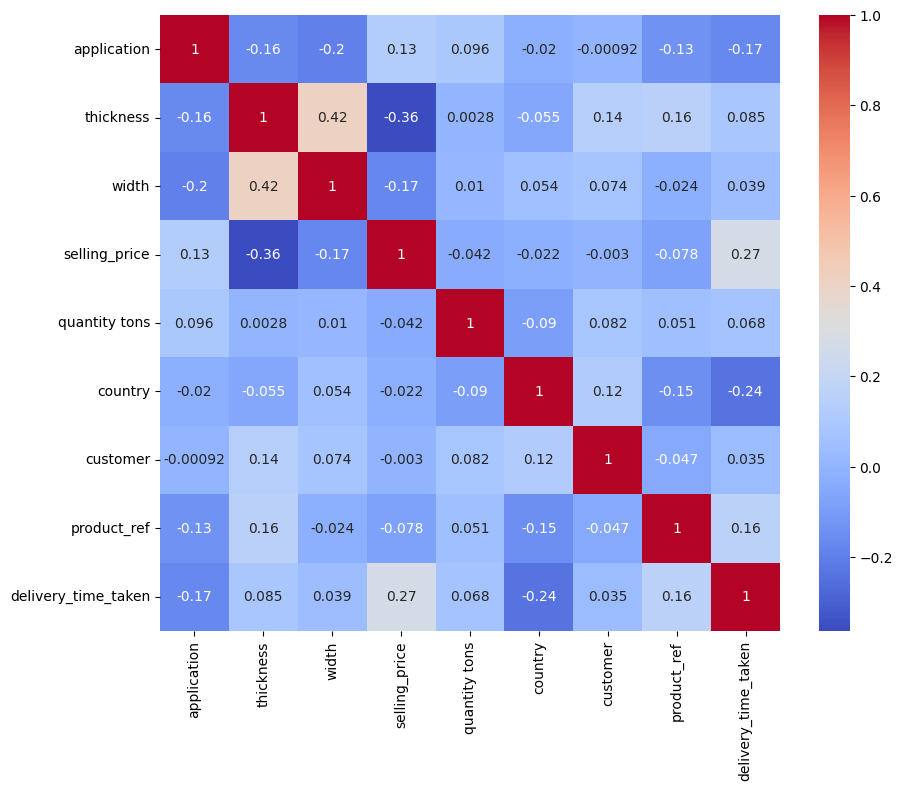

In [32]:
# Define the columns
numeric_columns = ['application','thickness','width','selling_price','quantity tons','country','customer','product_ref','delivery_time_taken']
# Calculate the correlation matrix
corr_matrix = skewed_data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [33]:
#Finding the Unique Values:
country = skewed_data['country'].unique()
status =skewed_data['status'].unique()
item= skewed_data['item type'].unique()
print(country)
print(status)
print(item)

[ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80. 107.  89.]
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


In [34]:
skewed_data.isna().sum()

id                     0
item_date              0
quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
material_ref           0
product_ref            0
delivery date          0
selling_price          0
delivery_time_taken    0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
#Encoding the categorical column:
encode=LabelEncoder()
encode_country=encode.fit(country)
transformed_country = encode_country.transform(country)

encode=LabelEncoder()
encode_status=encode.fit(status)
transformed_status = encode_status.transform(status)

encode=LabelEncoder()
encode_item=encode.fit(item)
transformed_item = encode_item.transform(item)

print(transformed_country)
print(transformed_status)
print(transformed_item)

[ 3  0  4  5  6 10  2  9 16 11  1  7  8 13 12 15 14]
[7 0 6 1 2 8 5 4 3]
[5 6 3 1 2 0 4]


In [36]:
import pickle
#saving the files in pickle
file_path='country.pkl'
file_path2='status.pkl'
file_path3='item type.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(encode_country, file)
with open(file_path2, 'wb') as file:
    pickle.dump(encode_status, file)
with open(file_path3, 'wb') as file:
    pickle.dump(encode_item, file)

print(f'Pickle file created: {file_path}, {file_path2},{file_path3}')

Pickle file created: country.pkl, status.pkl,item type.pkl


In [37]:
with open('status.pkl', 'rb') as file:
    encode_status = pickle.load(file)
    
transformed_status = encode_status.transform(status)
transformed_status

array([7, 0, 6, 1, 2, 8, 5, 4, 3])

regression model

In [38]:
category_col=['status', 'item type','country']
encoder= LabelEncoder()
for i in category_col:
    print(i)
    skewed_data[i] = encoder.fit_transform(skewed_data[i])
    print(skewed_data[i].unique())

skewed_data.head()

status
[7 0 6 1 2 8 5 4 3]
item type
[5 6 3 1 2 0 4]
country
[ 3  0  4  5  6 10  2  9 16 11  1  7  8 13 12 15 14]


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,3,7,5,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,151.448104,30202938.0,0,7,5,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,151.448104,30153963.0,4,7,6,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,151.448104,30349574.0,5,7,3,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,151.448104,30211560.0,3,7,5,10.0,4.00,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import pickle

X = skewed_data[[ 'quantity tons','thickness','width','country','status','item type', 'application','product_ref','delivery_time_taken']].values
y = skewed_data[['selling_price']].values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

file_path6='scaling.pkl'
with open(file_path6, 'wb') as file:
    pickle.dump(scaler, file)
print(f'Pickle file created: {file_path6}')

# Ensure y_train and y_test are 1-dimensional
y_train = y_train.ravel()
y_test = y_test.ravel()

# Create an instance of each regression model
et_model = ExtraTreesRegressor()
xgb_model = XGBRegressor()
dt_model = DecisionTreeRegressor()

# Train the models
et_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
et_preds = et_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Evaluate the models
et_mse = mean_squared_error(y_test, et_preds)
et_mae = mean_absolute_error(y_test, et_preds)
et_r2 = r2_score(y_test, et_preds)

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

print(f"ExtraTreeRegressor    MSE: {et_mse},  MAE: {et_mae},  R2: {et_r2}")
print(f"XGBRegressor          MSE: {xgb_mse},  MAE: {xgb_mae},  R2: {xgb_r2}")
print(f"DecisionTreeRegressor MSE: {dt_mse},  MAE: {dt_mae}, R2: {dt_r2}")

Pickle file created: scaling.pkl
ExtraTreeRegressor    MSE: 4654.401761335343,  MAE: 41.635003565766645,  R2: 0.8938393696123181
XGBRegressor          MSE: 8224.730109441769,  MAE: 68.18636857405686,  R2: 0.812404992529828
DecisionTreeRegressor MSE: 7687.644852785232,  MAE: 47.53727837952361, R2: 0.8246551832830709


In [40]:
# Save the trained models
et_model_file_path5 = 'ExtraTreesRegressor.pkl'
with open(et_model_file_path5, 'wb') as file:
    pickle.dump(et_model, file)
print(f'Extra Trees Regressor pickle file created: {et_model_file_path5}')

xgb_model_file_path6 = 'XGBRegressor.pkl'
with open(xgb_model_file_path6, 'wb') as file:
    pickle.dump(xgb_model, file)
print(f'XGBoost Regressor pickle file created: {xgb_model_file_path6}')

dt_model_file_path7 = 'DecisionTreeRegressor.pkl'
with open(dt_model_file_path7, 'wb') as file:
    pickle.dump(dt_model, file)
print(f'Decision Tree Regressor pickle file created: {dt_model_file_path7}')

Extra Trees Regressor pickle file created: ExtraTreesRegressor.pkl
XGBoost Regressor pickle file created: XGBRegressor.pkl
Decision Tree Regressor pickle file created: DecisionTreeRegressor.pkl


classification

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

# Assuming model_data contains your dataset
X = skewed_data[[ 'quantity tons','thickness','width','selling_price','country','item type','application','product_ref','delivery_time_taken']].values
y = skewed_data[['status']].values

# Standardize features
scaler_classify = StandardScaler()
scaler = scaler_classify.fit(X)
X = scaler_classify.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# Save the scaler to a file
file_path8 = 'scaling_classify.pkl'
with open(file_path8, 'wb') as file:
    pickle.dump(scaler_classify, file)
print(f'Pickle file created: {file_path8}')

# Create an instance of each classifier model
rf_model = RandomForestClassifier(random_state=0)  # Random Forest Classifier
xgb_cls_model = XGBClassifier(random_state=0)  # Extreme Gradient Boosting Classifier
dtc_model = DecisionTreeClassifier(random_state=0)  # Decision Tree Classifier

# Train the models
rf_model.fit(X_train, y_train)
xgb_cls_model.fit(X_train, y_train)
dtc_model.fit(X_train, y_train)

# Make predictions on the test set
rf_preds = rf_model.predict(X_test)
xgb_cls_preds = xgb_cls_model.predict(X_test)
dtc_preds = dtc_model.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_preds)
xgb_cls_accuracy = accuracy_score(y_test, xgb_cls_preds)
dtc_accuracy = accuracy_score(y_test, dtc_preds)

print(f"Random Forest Classifier Accuracy : {rf_accuracy}")
print(f"XGB Classifier Accuracy           : {xgb_cls_accuracy}")
print(f"Decision Tree Classifier Accuracy : {dtc_accuracy}")

Pickle file created: scaling_classify.pkl
Random Forest Classifier Accuracy : 0.9160336159125105
XGB Classifier Accuracy           : 0.836049029322177
Decision Tree Classifier Accuracy : 0.8791515284964586


In [42]:
# Save the models using pickle
file_path_rf = 'RandomForestClassifier.pkl'
with open(file_path_rf, 'wb') as file:
    pickle.dump(rf_model, file)
print(f'Pickle file created: {file_path_rf}')

file_path_xgb = 'XGBClassifier.pkl'
with open(file_path_xgb, 'wb') as file:
    pickle.dump(xgb_cls_model, file)
print(f'Pickle file created: {file_path_xgb}')

file_path_dtc = 'DecisionTreeClassifier.pkl'
with open(file_path_dtc, 'wb') as file:
    pickle.dump(dtc_model, file)
print(f'Pickle file created: {file_path_dtc}')

Pickle file created: RandomForestClassifier.pkl
Pickle file created: XGBClassifier.pkl
Pickle file created: DecisionTreeClassifier.pkl
